**In this project, we aim to predict the most favorable restaurant locations in Bangalore based on customer ratings, facilitating strategic decision-making for restaurant owners and investors.**

### 1. Importing the Necessary Libraries

In [1]:
import pandas as pd  #to manipulate the data we use pandas 

import numpy as np   #NumPy can be used to perform a wide variety of mathematical operations on arrays.

import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive 
                                       # visualizations in Python. Matplotlib makes easy things easy and hard things possible.
    
import seaborn as sns     #Seaborn library is a widely popular data visualization library that is commonly used for 
                                         #data science and machine learning tasks.
from warnings import filterwarnings  ## filter the Warning 
filterwarnings('ignore')

### 2. Loading the Dataset


In [2]:
df=pd.read_csv("zomato.csv") #read the data from zomato dataset using pandans
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.columns #checking columns 

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.shape

(51717, 17)

In [5]:
df.head(33)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


### 3. EDA [Exploratory Data Analysis]


### Removing unnecessary columns 

In [6]:
df['menu_item'].head() # this column does't have any information

0    []
1    []
2    []
3    []
4    []
Name: menu_item, dtype: object

In [7]:
df.dish_liked.head(2)

0    Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1    Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
Name: dish_liked, dtype: object

In [8]:
df.dish_liked.isnull().sum() # this column has lots of null value 

28078

In [9]:
data=df.drop(['menu_item','url','phone','address','dish_liked','menu_item','reviews_list','listed_in(city)'],axis=1)

# if i  use  inplace = True it effect my origenal data

data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


### cheching information about data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [11]:
data.shape #51717 columns and 10 rows

(51717, 10)

### check duplicated

In [12]:
data.duplicated() # checking duplicates records

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [13]:
data[data.duplicated()] # show the duplicated record which we have

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,"Continental, Asian, North Indian, Tea",500,Dine-out
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,"South Indian, Beverages",400,Dine-out
2482,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
2483,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Buffet
2488,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
...,...,...,...,...,...,...,...,...,...,...
51633,Re:fuel- Aloft Bengaluru Cessna Business Park,No,No,NaN,0,Bellandur,"Cafe, Bakery","Bakery, Beverages, Cafe, Coffee, Desserts, San...","1,000",Dine-out
51637,The Crunch,No,No,3.3 /5,6,Brookefield,Beverage Shop,Beverages,300,Dine-out
51639,Kale Cafe,No,No,NaN,0,Brookefield,Quick Bites,"Fast Food, Kerala",100,Dine-out
51642,Basaveshwara Khanavali,No,No,NaN,0,Brookefield,Quick Bites,South Indian,200,Dine-out



### drop the duplicates 

In [14]:
data.drop_duplicates(keep='first',inplace=True) # inplace is true means it effect original data

In [15]:
data.shape

(35011, 10)

In [16]:
data.isnull().sum() #check the whether data has null value or not if it has null records then count the records

name                              0
online_order                      0
book_table                        0
rate                           3770
votes                             0
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
listed_in(type)                   0
dtype: int64

In [17]:
null_values = {i:data[i].isnull().sum() for i in data.columns} #it is same has privious code in deffirent way

null_values

{'name': 0,
 'online_order': 0,
 'book_table': 0,
 'rate': 3770,
 'votes': 0,
 'location': 14,
 'rest_type': 156,
 'cuisines': 33,
 'approx_cost(for two people)': 221,
 'listed_in(type)': 0}

In [18]:
empty_data = data.isnull().sum() #just i want to show only null value 
empty_data[empty_data>0]

rate                           3770
location                         14
rest_type                       156
cuisines                         33
approx_cost(for two people)     221
dtype: int64

In [19]:
data[data.isnull().any(axis=1)] #it shows the all null value 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
84,Chill Out,No,No,NaN,0,Banashankari,Quick Bites,"South Indian, Chinese",100,Delivery
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,"Bakery, Desserts",500,Delivery
91,Sunsadm,No,No,NaN,0,Banashankari,"Takeaway, Delivery",South Indian,400,Delivery
92,Annapooraneshwari Mess,No,No,NaN,0,Banashankari,Mess,South Indian,200,Delivery
107,Coffee Shopee,No,No,NaN,0,Banashankari,"Takeaway, Delivery",Beverages,250,Delivery
...,...,...,...,...,...,...,...,...,...,...
51644,Punjabi Thadka,No,No,NaN,0,Brookefield,Quick Bites,North Indian,400,Dine-out
51675,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Drinks & nightlife
51710,Topsy Turvey,No,No,NaN,0,Whitefield,Bar,Finger Food,900,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars



### visualization null values by using heatmap

<Axes: >

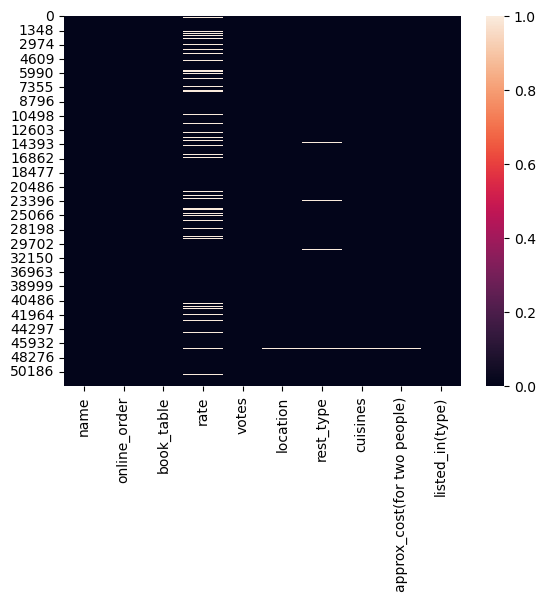

In [20]:
sns.heatmap(data.isnull())


# cleaning the Rate column


In [21]:
print("There are {} values are unique in Rate Columns".format(len(data["rate"].unique())))
                                #it gives the length of the unique value in the rate column

data["rate"].unique() #it shows unique value in the rate column

There are 65 values are unique in Rate Columns


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
data[data["rate"]=="-"].head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
3068,House of Tasty Food,No,No,-,0,Wilson Garden,Quick Bites,North Indian,400,Delivery
3069,Super Chef's (New Royal treat),No,No,-,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery


In [23]:
data[data["rate"]=="NEW"].head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
72,Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,Delivery
75,Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,Delivery


### i noted that i want chenge object datatype to float datatype and some string value "NEW","-" to Nan and i don't want that "/5"

In [24]:
def rate(data):                          #using function and function name is data
    if data == "NEW" or data == "-":     #if any columns have "NEW","-" it convert to nun
        return np.nan                    #NumPy NAN stands for not a number and is defined as a substitute for declaring value
                                                   #which are numerical values that are missing values in an array 
    else:                                   
        data = str(data).split("/")       # i split the data "/"
        data = data[0]                     
        return float(data)                  #it returns float

In [25]:
data["rate"].apply(rate) #here we can see i removed "/5" and i converted object to float because i should float type not object

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 35011, dtype: float64

In [26]:
data["rate"] = data["rate"].apply(rate)  # the result of the function i declare to rate column in original data

<Axes: >

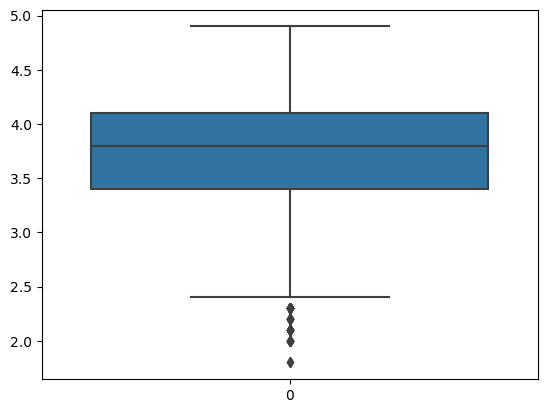

In [27]:
sns.boxplot(data.rate) # just i want to see wheather my column has extreme outliers then the column's data is good 

In [28]:
data["rate"].value_counts().index

Float64Index([3.9, 3.8, 3.7, 4.0, 4.1, 3.6, 3.5, 4.2, 3.4, 3.3, 4.3, 3.2, 3.1,
              4.4, 3.0, 4.5, 2.9, 2.8, 4.6, 2.7, 2.6, 4.7, 2.5, 4.8, 2.4, 4.9,
              2.3, 2.1, 2.2, 2.0, 1.8],
             dtype='float64')

In [29]:
data["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [30]:
#Now replace null value with the mean value that complete rate column

data["rate"] = data["rate"].fillna(data["rate"].mean()) #fillna file the all nun values

## rate column has zero null value now

In [31]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                      156
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [32]:
data.rest_type.nunique()

93

In [33]:
data[data.rest_type.isna()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
999,Mughlai Kitchen,Yes,No,3.500000,269,BTM,NaN,"Mughlai, North Indian, Chinese, Momos",600,Delivery
1300,Eat & Joy Restaurant,Yes,No,3.000000,7,JP Nagar,NaN,"Fast Food, Finger Food",300,Delivery
1376,Kababish Restaurant,Yes,No,3.600000,15,BTM,NaN,"North Indian, Chinese, Arabian",700,Delivery
1565,Goli Vada Pav No 1,No,No,3.730491,0,Bannerghatta Road,NaN,"Street Food, Burger",150,Delivery
1637,Ammi's Biryani,No,No,2.400000,392,Bannerghatta Road,NaN,"Biryani, North Indian",500,Delivery
...,...,...,...,...,...,...,...,...,...,...
50838,Vijayawada Heights,Yes,No,3.200000,8,Whitefield,NaN,North Indian,600,Delivery
50978,Snack Itt,No,No,3.730491,0,Whitefield,NaN,Bakery,200,Desserts
51130,Pindi Bangalore,Yes,No,3.730491,0,Whitefield,NaN,"North Indian, Chinese, Biryani, Street Food",900,Dine-out
51195,Special Biryani House,Yes,No,3.200000,202,Whitefield,NaN,"North Indian, Biryani, Chinese",400,Dine-out


In [34]:
data['rest_type'].mode()[0]

'Quick Bites'

In [35]:
 #  Take most occured category in that vairable (.mode())
Mode_Category =data['rest_type'].mode()[0]

In [36]:
# Replace NAN values with most occured category in actual vairable
data['rest_type'].fillna(Mode_Category,inplace=True)

In [37]:
data.rest_type.isna().sum()

0

In [38]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        14
rest_type                        0
cuisines                        33
approx_cost(for two people)    221
listed_in(type)                  0
dtype: int64

In [39]:
data[data.location.isnull()] # here i check that "location	rest_type	cuisines	approx_cost(for two people)" 
                                #these all columns have null values. i should remove those null values

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1662,Papa Khan Rasoi,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
13693,Mohabbat Desi Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
16351,Desi Chatkara,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
26432,New Taj Biryani Centre,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
26519,AB's - Absolute Barbecues,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Buffet
27672,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
28611,Manchow,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
33457,La Lunch Box,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Delivery
40354,The Happy Vegetarian,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Dine-out
40556,Risalo Restaurant,No,No,3.730491,0,NaN,Quick Bites,NaN,NaN,Cafes


In [40]:
data.dropna(subset=['location'],inplace=True)

In [41]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                        19
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [42]:
data[data.cuisines.isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
438,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Delivery
440,Lassi Spot,Yes,No,3.300000,4,Kumaraswamy Layout,Beverage Shop,NaN,100,Delivery
759,The House Of Vadapav,Yes,No,3.730491,0,Banashankari,Quick Bites,NaN,150,Dine-out
4037,Chai Point,Yes,No,3.730491,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,200,Delivery
6887,Noodle Oodle,Yes,No,3.600000,9,Whitefield,Delivery,NaN,400,Delivery
6897,Taste of Chettinad,Yes,No,3.730491,0,Whitefield,Delivery,NaN,400,Delivery
7277,Watheen Nuts,No,No,3.730491,0,Whitefield,"Takeaway, Delivery",NaN,400,Delivery
7555,Delhi Food Factory,Yes,No,3.730491,0,Marathahalli,Delivery,NaN,500,Delivery
13591,Delhi Food Factory,Yes,No,3.730491,0,Electronic City,Delivery,NaN,500,Delivery
22974,Delhi Food Factory,No,No,3.730491,0,Kumaraswamy Layout,Delivery,NaN,500,Delivery


In [43]:
Mode_Category =data['cuisines'].mode()[0]
data['cuisines'].fillna(Mode_Category,inplace=True)

In [44]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    207
listed_in(type)                  0
dtype: int64

In [45]:
data[data['approx_cost(for two people)'].isnull()]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
1768,Innate,No,No,3.730491,0,JP Nagar,Delivery,Beverages,NaN,Delivery
1795,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3069,Super Chef's (New Royal treat),No,No,3.730491,0,Bannerghatta Road,Quick Bites,"North Indian, Chinese, South Indian",NaN,Delivery
3774,The Hub - Ibis Bengaluru,No,No,3.900000,237,Marathahalli,Bar,Finger Food,NaN,Buffet
3954,North Indian Kitchen,No,No,3.200000,13,HSR,Takeaway,North Indian,NaN,Delivery
...,...,...,...,...,...,...,...,...,...,...
50764,Innate,No,No,3.730491,0,Whitefield,Delivery,Beverages,NaN,Delivery
50940,Cinnabon,No,No,4.000000,80,Whitefield,Quick Bites,"Beverages, American, Bakery",NaN,Desserts
51247,Mast Kalandar,No,No,2.600000,76,Whitefield,Casual Dining,North Indian,NaN,Dine-out
51271,Karavalli Food Court,No,No,3.200000,4,Whitefield,Casual Dining,South Indian,NaN,Dine-out


In [46]:
# Rename columns

data.rename(columns = {"approx_cost(for two people)":"Cost2plate","listed_in(type)":"Type"},inplace = True)

In [47]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet


## cleaning the Cost2plate column

In [48]:
data["Cost2plate"].unique() #show the unique values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
def remove_quote(data):
    if ',' in data:
        data=data.replace(',','')
        return flot(data)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data["Cost2plate"]=data["Cost2plate"].replace({",":""})

In [49]:
columns_to_convert = ['Cost2plate']
data[columns_to_convert] = data[columns_to_convert].apply(lambda x: x.str.replace(',', '').astype(float))

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34997 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34997 non-null  object 
 1   online_order  34997 non-null  object 
 2   book_table    34997 non-null  object 
 3   rate          34997 non-null  float64
 4   votes         34997 non-null  int64  
 5   location      34997 non-null  object 
 6   rest_type     34997 non-null  object 
 7   cuisines      34997 non-null  object 
 8   Cost2plate    34790 non-null  float64
 9   Type          34997 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


In [51]:
data["Cost2plate"].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [52]:
data["Cost2plate"].value_counts()

300.0     4593
400.0     4466
500.0     3351
200.0     2950
600.0     2564
          ... 
469.0        1
5000.0       1
3700.0       1
160.0        1
190.0        1
Name: Cost2plate, Length: 70, dtype: int64

In [ ]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
        return float(value)

In [ ]:
data['Cost2plate'].apply(remove_comma)

In [ ]:
data['Cost2plate']=data['Cost2plate'].apply(remove_comma) # result data assigned to cost2plate column in the original data

In [53]:
data.describe()

,rate,votes,Cost2plate
count,34997.000000,34997.000000,34790.000000
mean,3.730491,362.556762,593.568181
std,0.418817,940.316461,462.276792
min,1.800000,0.000000,40.000000
25%,3.500000,11.000000,300.000000
50%,3.730491,58.000000,450.000000
75%,4.000000,270.000000,700.000000
max,4.900000,16832.000000,6000.000000


**the Cost2plate column is cleaned now**

<Axes: >

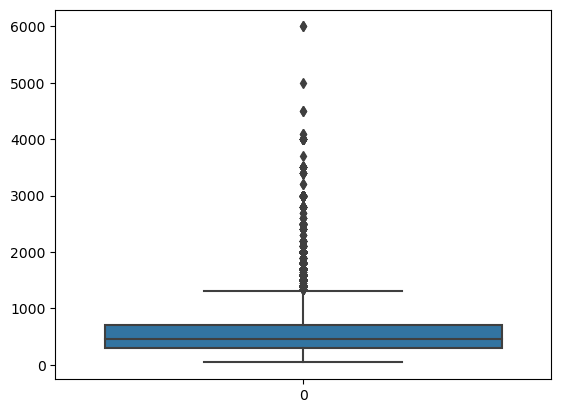

In [54]:
sns.boxplot(data.Cost2plate)

# i want to check outlies in my data

<Axes: >

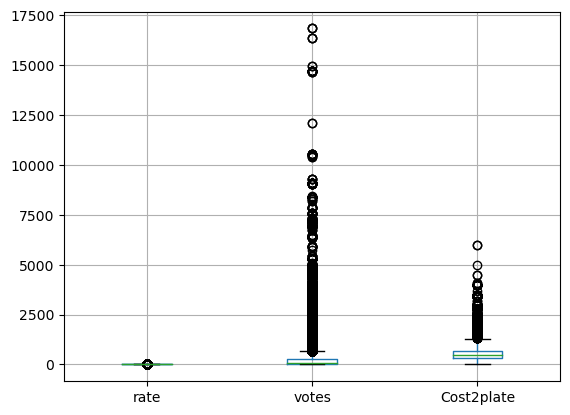

In [55]:
data.boxplot()

In [56]:
data[(data["votes"]>10000)].shape

(38, 10)

In [57]:
data=data[data["votes"]<10000]

In [ ]:
# in the votes column has null values then i need to remove those 
Q1 = df.votes.quantile(0.25)
Q3 = df.votes.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print("the value of lower_limit is",lower_limit)
print("the value of upper_limit is",upper_limit)

In [ ]:
data[(data.votes<lower_limit)|(data.votes>upper_limit)]

In [ ]:
data= data[(data.votes>lower_limit)&(data.votes<upper_limit)]

<Axes: >

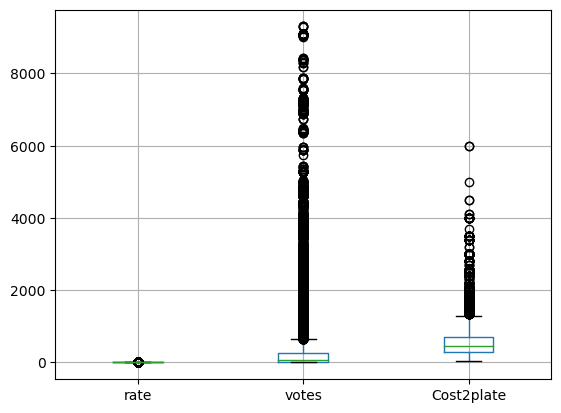

In [58]:
data.boxplot()

In [59]:
data[(data.Cost2plate>3010)].shape #these is extreme outlies in my cost2plate column's data i should remove that

(62, 10)

In [60]:
data=data[(data.Cost2plate<3010)]

<Axes: >

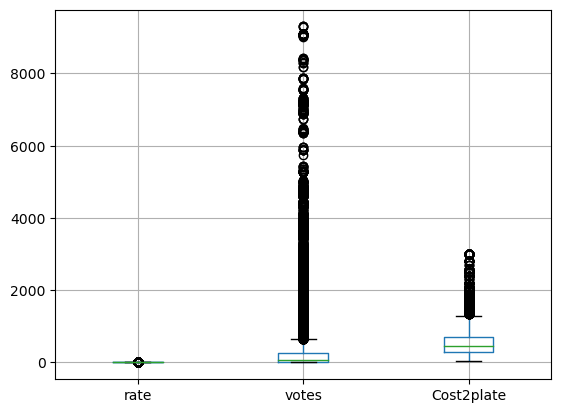

In [61]:
data.boxplot()

In [62]:
data[(data.Cost2plate>2800)].shape # i checked that above little outlier but that outlies contains 65 columns i shouldn't remove

(116, 10)

In [64]:
data["Cost2plate"] = data["Cost2plate"].fillna(data["Cost2plate"].mean())

In [65]:
data.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost2plate      0
Type            0
dtype: int64

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34690 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34690 non-null  object 
 1   online_order  34690 non-null  object 
 2   book_table    34690 non-null  object 
 3   rate          34690 non-null  float64
 4   votes         34690 non-null  int64  
 5   location      34690 non-null  object 
 6   rest_type     34690 non-null  object 
 7   cuisines      34690 non-null  object 
 8   Cost2plate    34690 non-null  float64
 9   Type          34690 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


**these is no null values in my data**

## all the datatype is set now

In [67]:
data.info()
# all the datatype set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34690 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34690 non-null  object 
 1   online_order  34690 non-null  object 
 2   book_table    34690 non-null  object 
 3   rate          34690 non-null  float64
 4   votes         34690 non-null  int64  
 5   location      34690 non-null  object 
 6   rest_type     34690 non-null  object 
 7   cuisines      34690 non-null  object 
 8   Cost2plate    34690 non-null  float64
 9   Type          34690 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


In [68]:
data.head(2) #if u check above all datatype has been done and no null values 

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet


In [69]:
data.shape

(34690, 10)

# cleaning  and clustering the rest_type column



In [70]:
data['rest_type'].value_counts() # all those rest have less like 1,2 ,etc.
                                                #what i can do is i will make cluster to make 1 to 1000 as other

Quick Bites                   12265
Casual Dining                  7533
Cafe                           2578
Delivery                       1509
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [71]:
rest_type=data['rest_type'].value_counts()  #i assigned data to rest_type variable
rest_type

Quick Bites                   12265
Casual Dining                  7533
Cafe                           2578
Delivery                       1509
Dessert Parlor                 1491
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [72]:
rest_type_lessthan1000=rest_type[rest_type<1000]  # filtered the data lessthan 1000 and assign
rest_type_lessthan1000

Casual Dining, Bar            936
Bakery                        736
Beverage Shop                 488
Bar                           473
Food Court                    424
                             ... 
Pop Up                          1
Quick Bites, Kiosk              1
Mess, Quick Bites               1
Dessert Parlor, Food Court      1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 87, dtype: int64

In [73]:
def handle_rest_type(value):                   # using function like whereever 1 to 1000 data is their then i shows 'Others'
    if(value in rest_type_lessthan1000):                                        # by using if statement
        return 'others'
    else:
        return value

In [74]:
data['rest_type']=data['rest_type'].apply(handle_rest_type) # same like assigned the data

In [75]:
data['rest_type'].value_counts()

Quick Bites           12265
others                 8097
Casual Dining          7533
Cafe                   2578
Delivery               1509
Dessert Parlor         1491
Takeaway, Delivery     1217
Name: rest_type, dtype: int64

In [76]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# cleaning and clustering the location column



In [77]:
data['location'].value_counts() #i will make clustering like lessthan 300

BTM                     2501
Whitefield              1963
HSR                     1760
Indiranagar             1748
Marathahalli            1665
                        ... 
Yelahanka                  5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [78]:
data['location'].value_counts().unique()

array([2501, 1963, 1760, 1748, 1665, 1577, 1407, 1244, 1221, 1134, 1056,
        932,  687,  624,  598,  595,  591,  587,  584,  573,  556,  554,
        546,  539,  469,  463,  462,  446,  432,  420,  398,  395,  392,
        381,  345,  287,  262,  258,  244,  180,  177,  176,  173,  167,
        164,  157,  147,  134,  129,  128,  119,  117,  114,  106,  103,
        102,  100,   95,   90,   84,   81,   79,   75,   72,   64,   62,
         53,   51,   47,   46,   37,   34,   21,   19,   18,   17,   16,
         14,   13,   10,    6,    5,    4,    2,    1], dtype=int64)

In [79]:
#same like previous

location=data['location'].value_counts()
location
location_less150=location[location<150]

def handle_location(value):
    if(value in location_less150):
        return 'others'
    else:
        return value
    

In [80]:
data['location']=data['location'].apply(handle_location) # assigned
data['location'].value_counts()

others                   2600
BTM                      2501
Whitefield               1963
HSR                      1760
Indiranagar              1748
Marathahalli             1665
Koramangala 5th Block    1577
JP Nagar                 1407
Jayanagar                1244
Electronic City          1221
Bellandur                1134
Bannerghatta Road        1056
Sarjapur Road             932
Brigade Road              687
Koramangala 7th Block     624
Brookefield               598
Koramangala 6th Block     595
Kalyan Nagar              591
Koramangala 4th Block     587
New BEL Road              584
Banashankari              573
Malleshwaram              556
MG Road                   554
Ulsoor                    546
Koramangala 1st Block     539
Frazer Town               469
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 432
Kammanahalli              420
Residency Road            398
Old Airport Road          395
Lavelle Ro

In [81]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# cleaning and clustering the cuisines column



In [82]:
data['cuisines'].value_counts()  #cluster just 1 to 100 values

North Indian                                   1914
North Indian, Chinese                          1577
South Indian                                   1171
Bakery, Desserts                                593
Biryani                                         560
                                               ... 
Salad, Juices                                     1
Pizza, Italian, Chinese, Rolls, Biryani           1
Burger, Juices                                    1
North Indian, Fast Food, Biryani, Beverages       1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2703, dtype: int64

In [83]:
data['cuisines'].value_counts().unique()

array([1914, 1577, 1171,  593,  560,  485,  475,  447,  387,  332,  304,
        260,  253,  238,  226,  212,  207,  200,  190,  186,  179,  174,
        164,  162,  159,  154,  152,  147,  145,  142,  139,  138,  135,
        130,  129,  128,  126,  125,  123,  120,  119,  115,  114,  110,
        105,  104,  102,   99,   97,   96,   95,   82,   81,   76,   75,
         72,   71,   68,   67,   65,   64,   62,   61,   60,   58,   57,
         56,   55,   54,   53,   52,   51,   50,   49,   48,   46,   45,
         44,   43,   42,   41,   40,   39,   38,   37,   36,   35,   34,
         33,   32,   31,   30,   29,   28,   27,   26,   25,   24,   23,
         22,   21,   20,   19,   18,   17,   16,   15,   14,   13,   12,
         11,   10,    9,    8,    7,    6,    5,    4,    3,    2,    1],
      dtype=int64)

In [84]:
# same as previous

cuisines=data['cuisines'].value_counts()
cuisines
cuisines_less100=cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_less100):
        return 'others'
    else:
        return value

In [85]:
data['cuisines']=data['cuisines'].apply(handle_cuisines) #assigned
data['cuisines'].value_counts()

others                                              19617
North Indian                                         1914
North Indian, Chinese                                1577
South Indian                                         1171
Bakery, Desserts                                      593
Biryani                                               560
Fast Food                                             485
South Indian, North Indian, Chinese                   475
Desserts                                              447
Cafe                                                  447
Bakery                                                387
Chinese                                               332
Ice Cream, Desserts                                   304
Mithai, Street Food                                   260
Chinese, North Indian                                 253
North Indian, Chinese, Biryani                        238
Desserts, Ice Cream                                   226
North Indian, 

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34690 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          34690 non-null  object 
 1   online_order  34690 non-null  object 
 2   book_table    34690 non-null  object 
 3   rate          34690 non-null  float64
 4   votes         34690 non-null  int64  
 5   location      34690 non-null  object 
 6   rest_type     34690 non-null  object 
 7   cuisines      34690 non-null  object 
 8   Cost2plate    34690 non-null  float64
 9   Type          34690 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.9+ MB


In [87]:
data['Type'].value_counts()

Delivery              16071
Dine-out              12787
Desserts               2459
Cafes                  1233
Drinks & nightlife      895
Buffet                  655
Pubs and bars           590
Name: Type, dtype: int64

# Data is Cleaned now, Lets go to to Visualization




In [88]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plate', 'Type'],
      dtype='object')

## 4.1) Histograms

Histograms are one of the most common graphs used to display numeric data.
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

In [89]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


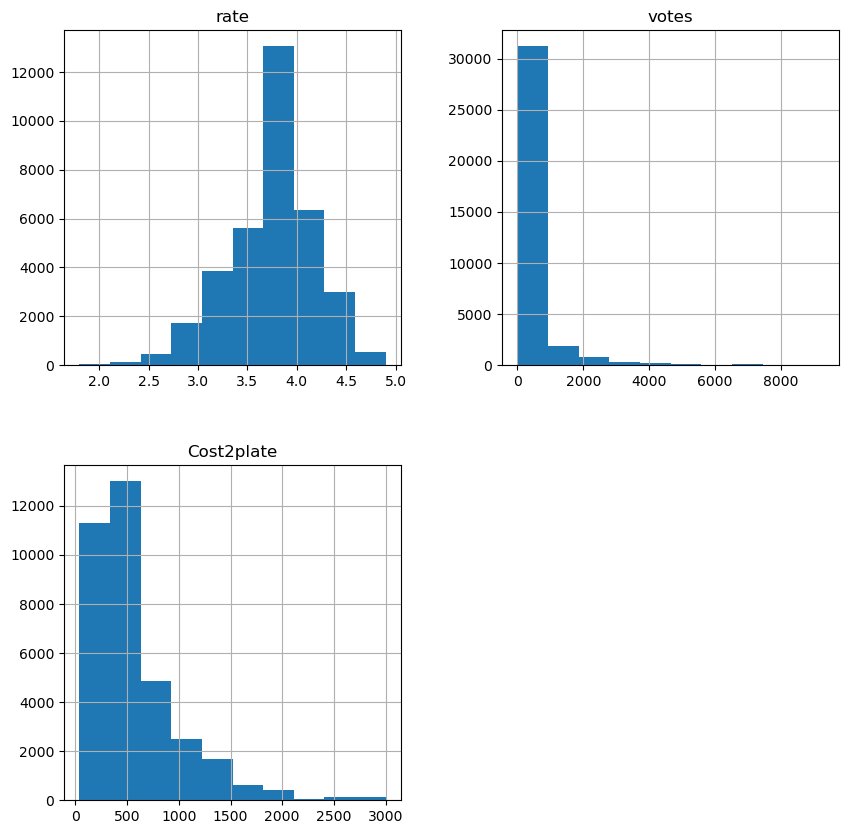

In [90]:
# Histogram of each feature
data.hist(bins=10,figsize=(10,10))    
plt.show()

# Count Plot of Various Locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Bommanahalli'),
  Text(8, 0, 'Electronic City'),
  Text(9, 0, 'HSR'),
  Text(10, 0, 'Marathahalli'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Shanti Nagar'),
  Text(13, 0, 'Koramangala 5th Block'),
  Text(14, 0, 'Richmond Road'),
  Text(15, 0, 'Koramangala 7th Block'),
  Text(16, 0, 'Koramangala 4th Block'),
  Text(17, 0, 'Bellandur'),
  Text(18, 0, 'Whitefield'),
  Text(19, 0, 'Old Airport Road'),
  Text(20, 0, 'Indiranagar'),
  Text(21, 0, 'Koramangala 1st Block'),
  Text(22, 0, 'Frazer Town'),
  Text(23, 0, 'MG Road'),
  Text(24, 0, 'Brigade Road'),
  Text(25, 0, 

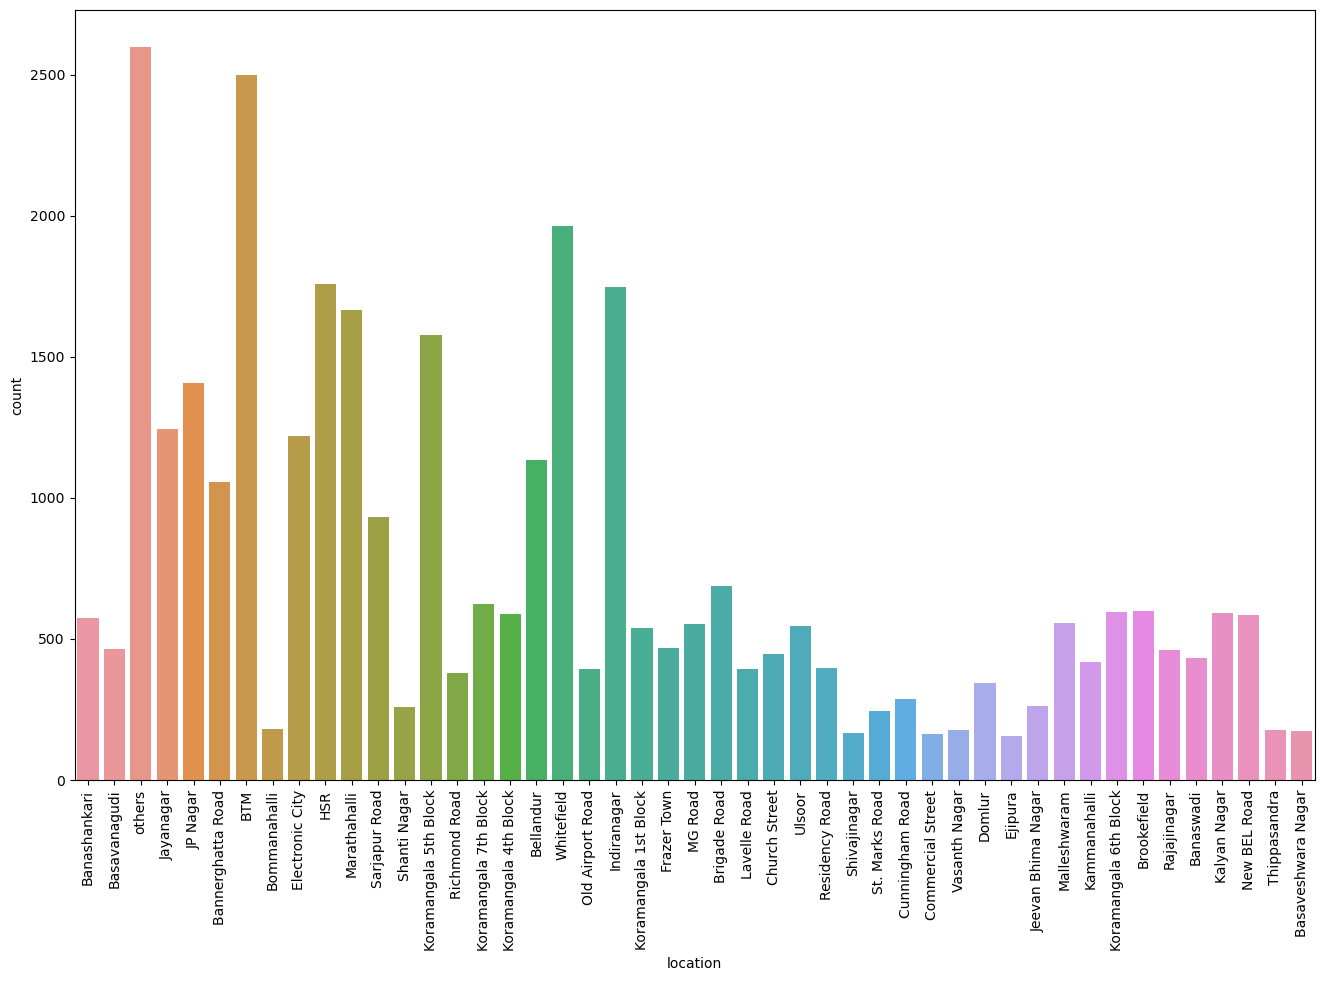

In [91]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=data,x='location')
plt.xticks(rotation=90)

**Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.**

# Visualizing Online Order

<Axes: xlabel='online_order', ylabel='count'>

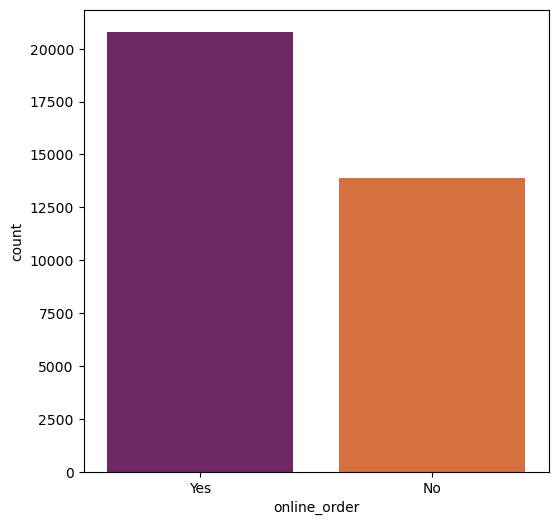

In [92]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='online_order', palette = 'inferno')

**The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.**

# Visualizing book_table



<Axes: xlabel='book_table', ylabel='count'>

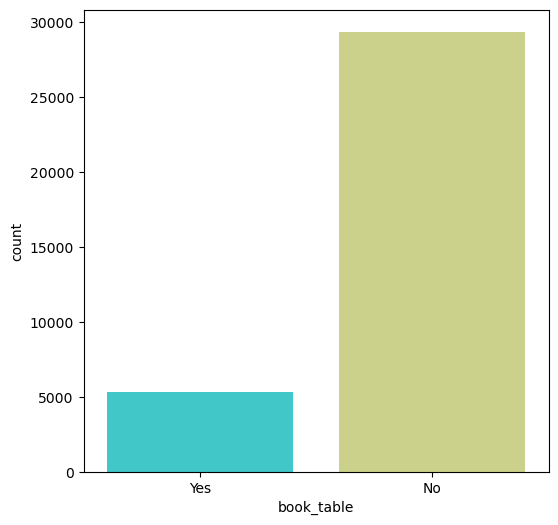

In [93]:
plt.figure(figsize = (6,6))
sns.countplot(data=data,x='book_table', palette = 'rainbow')

**the analysis reveals a comparatively lower count of "book_table" instances with the choice "No."**

# Visualizing Online Order vs Rate


<Axes: xlabel='online_order', ylabel='rate'>

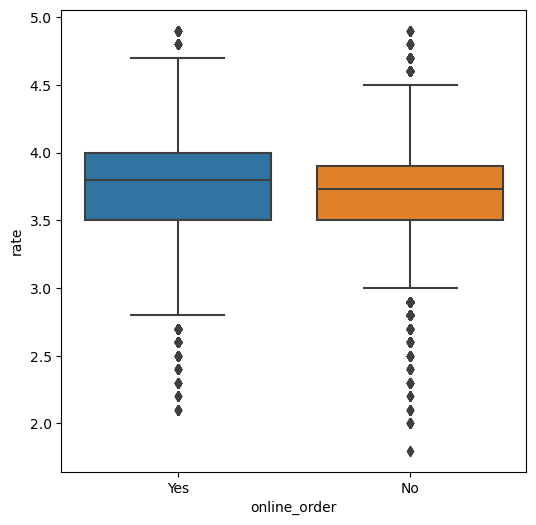

In [94]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate',data = data,orient='v')

# Visualizing Book Table vs Rate



<Axes: xlabel='book_table', ylabel='rate'>

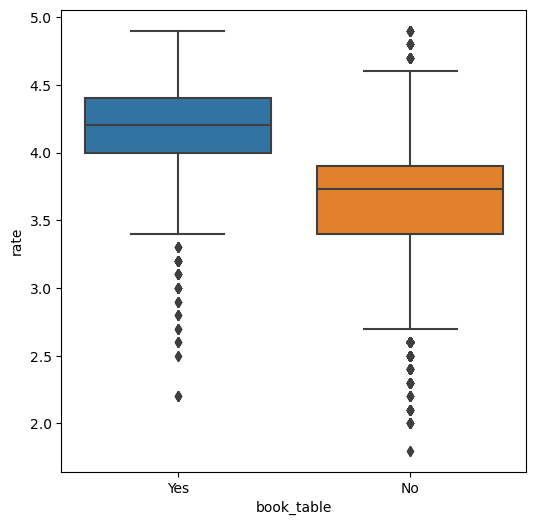

In [95]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = data)

# Visualizing Online Order Facility, Location Wise



In [96]:
df1 = data.groupby(['location','online_order'])['name'].count() # i am going to grouping my data location wise and i 
                                                                              #going to create new csv formate.
    
#to_csv() function converts DataFrame into CSV data. We can pass a file object to write the CSV data into a file.
                                     #Otherwise, the CSV data is returned in the string format.       
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1, values=None, index=['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     802  1699
Banashankari            260   313
Banaswadi               213   219
Bannerghatta Road       403   653
Basavanagudi            182   281
Basaveshwara Nagar       81    92
Bellandur               443   691
Bommanahalli             99    81
Brigade Road            293   394
Brookefield             206   392
Church Street           182   264
Commercial Street        86    78
Cunningham Road          82   205
Domlur                  187   158
Ejipura                  70    87
Electronic City         661   560
Frazer Town             206   263
HSR                     441  1319
Indiranagar             646  1102
JP Nagar                563   844
Jayanagar               382   862
Jeevan Bhima Nagar       65   197
Kalyan Nagar            241   350
Kammanahalli            176   244
Koramangala 1st Block   148   391
Koramangala 4th Block   279   308
Koramangala 5th Block   552  1025
Koramangala 6th Block   211   384
Koramangala 7th Block   190   434
Lavelle Road            233   159
MG Road                 297   257
Malleshwaram            224   332
Marathahalli            640  1025
New BEL Road            250   334
Old Airport Road        195   200
Rajajinagar             214   248
Residency Road          251   147
Richmond Road           241   140
Sarjapur Road           283   649
Shanti Nagar            135   123
Shivajinagar            100    67
St. Marks Road          124   120
Thippasandra             96    80
Ulsoor                  201   345
Vasanth Nagar            92    85
Whitefield              885  1078
others                 1072  1528

<Axes: xlabel='location'>

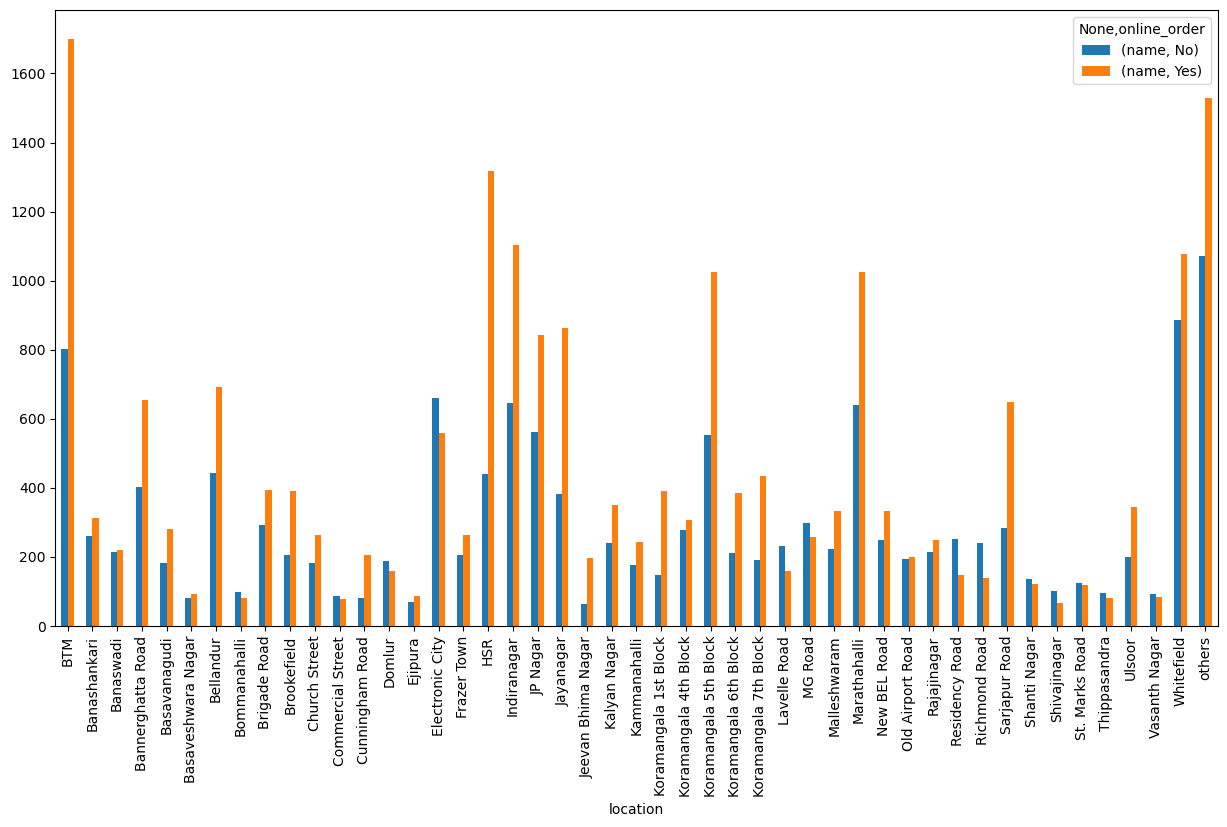

In [97]:
df1.plot(kind = 'bar', figsize = (15,8))

**Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.**

# Visualizing Book Table Facility, Location Wise



In [98]:
df2 = data.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    2375  126
Banashankari            530   43
Banaswadi               426    6
Bannerghatta Road       977   79
Basavanagudi            451   12
Basaveshwara Nagar      155   18
Bellandur              1038   96
Bommanahalli            177    3
Brigade Road            541  146
Brookefield             525   73
Church Street           279  167
Commercial Street       164    0
Cunningham Road         167  120
Domlur                  300   45
Ejipura                 157    0
Electronic City        1125   96
Frazer Town             461    8
HSR                    1573  187
Indiranagar            1311  437
JP Nagar               1155  252
Jayanagar              1017  227
Jeevan Bhima Nagar      258    4
Kalyan Nagar            473  118
Kammanahalli            386   34
Koramangala 1st Block   497   42
Koramangala 4th Block   340  247
Koramangala 5th Block   989  588
Koramangala 6th Block   514   81
Koramangala 7th Block   494  130
Lavelle Road            195  197
MG Road                 286  268
Malleshwaram            475   81
Marathahalli           1510  155
New BEL Road            529   55
Old Airport Road        347   48
Rajajinagar             422   40
Residency Road          304   94
Richmond Road           308   73
Sarjapur Road           791  141
Shanti Nagar            210   48
Shivajinagar            154   13
St. Marks Road          137  107
Thippasandra            176    0
Ulsoor                  433  113
Vasanth Nagar           165   12
Whitefield             1711  252
others                 2359  241

<Axes: xlabel='location'>

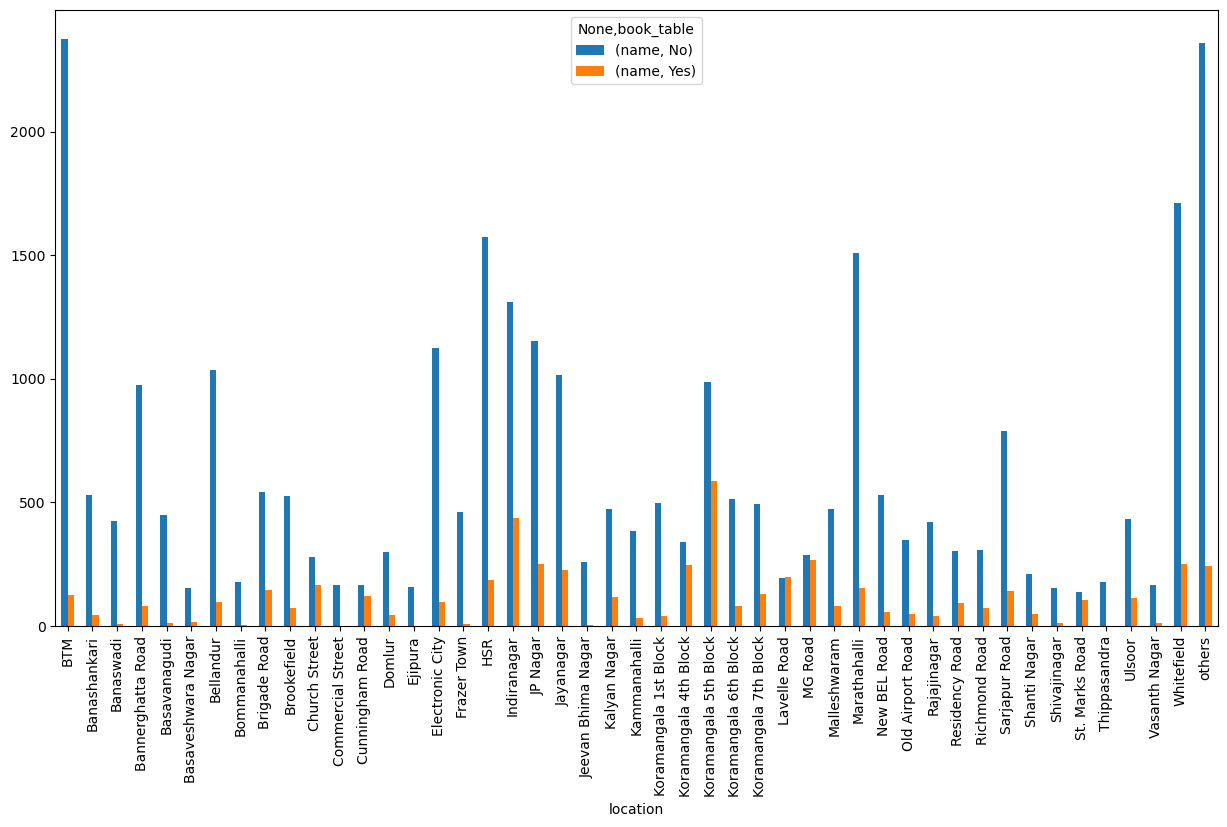

In [99]:
df2.plot(kind = 'bar', figsize = (15,8))

**Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.**

# Visualizing Types of Restaurents vs Rate



<Axes: xlabel='Type', ylabel='rate'>

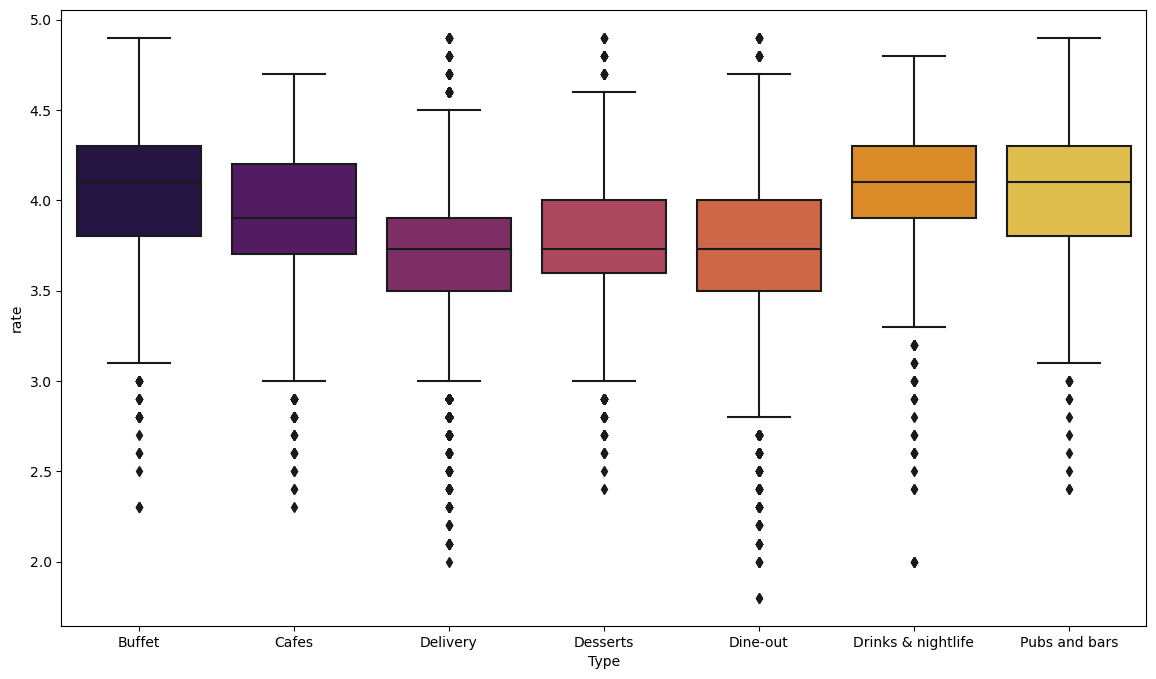

In [100]:
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Type', y = 'rate', data = data, palette = 'inferno',orient='v')

**An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

# Grouping Types of Restaurents, location wise



In [101]:
df3 = data.groupby(['location','Type'])['name'].count()
df3.to_csv('location_Type.csv')
df3 = pd.read_csv('location_Type.csv')
df3 = pd.pivot_table(df3, values=None, index=['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       15    46     1429      110      872   
Banashankari               5    24      244       46      247   
Banaswadi                  0    13      159       19      236   
Bannerghatta Road          8    27      512       92      406   
Basavanagudi               4     8      195       45      208   
Basaveshwara Nagar         2     5       73       22       66   
Bellandur                 28    34      519       72      448   
Bommanahalli               2     1       98       10       67   
Brigade Road              13    24      249       55      273   
Brookefield                6    17      299       42      230   
Church Street             19    44      138       21      172   
Commercial Street          0     5       57       33       69   
Cunningham Road           13    23      103       20      111   
Domlur                    11    12      168       24      108   
Ejipura                    0     0      103        7       47   
Electronic City           22    24      552       71      510   
Frazer Town                1    10      267       46      141   
HSR                       14    42     1080      110      485   
Indiranagar               38    97      833      136      514   
JP Nagar                  25    41      632      104      558   
Jayanagar                 19    50      560      118      485   
Jeevan Bhima Nagar         0     6      134       16      106   
Kalyan Nagar               9    24      190       45      308   
Kammanahalli               2    14      161       18      222   
Koramangala 1st Block      3    14      319       32      156   
Koramangala 4th Block     13    43      249       38      163   
Koramangala 5th Block     46   113      621      135      532   
Koramangala 6th Block     12    30      281       48      181   
Koramangala 7th Block     19    30      247       69      215   
Lavelle Road              24    22       87       28      154   
MG Road                   32    55      138       37      221   
Malleshwaram              11    24      197       63      231   
Marathahalli              33    30      885       94      601   
New BEL Road               4    29      278       34      223   
Old Airport Road          10     5      175       35      149   
Rajajinagar                9     4      196       44      196   
Residency Road            10    19      106       38      171   
Richmond Road             41    13      110       37      164   
Sarjapur Road             23    19      473       78      300   
Shanti Nagar               6    11       97       24      112   
Shivajinagar               4     7       46       13       90   
St. Marks Road             2     7       75        7       96   
Thippasandra               0     5       80       19       68   
Ulsoor                    12    32      217       38      216   
Vasanth Nagar              2    13       79       11       68   
Whitefield                28    50      946      129      731   
others                    55    67     1414      126      860   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   15            14  
Banashankari                           7             0  
Banaswadi                              4             1  
Bannerghatta Road                      9             2  
Basavanagudi                           3             0  
Basaveshwara Nagar                     2             3  
Bellandur                             17            16  
Bommanahalli                           1             1  
Brigade Road                          51            22  
Brookefield                            4             0  
Church Street                   

<Axes: xlabel='location'>

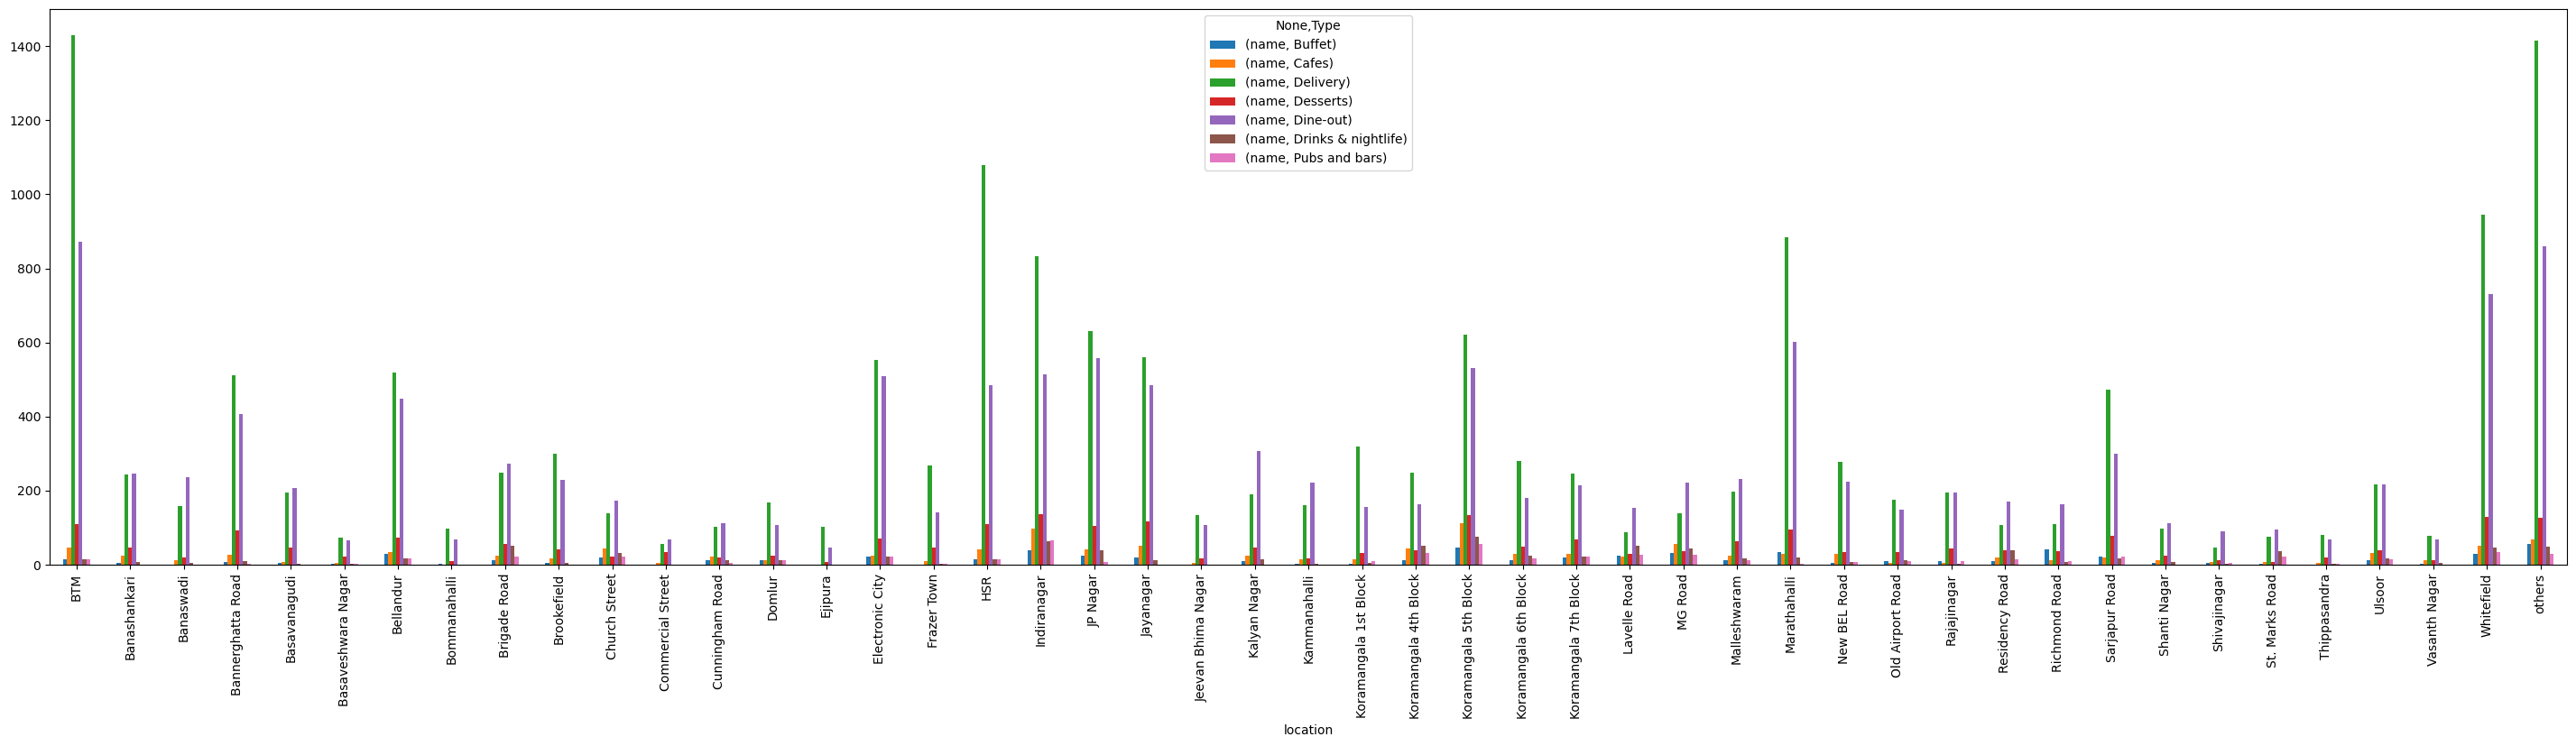

In [102]:
df3.plot(kind = 'bar', figsize = (36,8))

**Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.**

# No. of Votes, Location Wise



In [103]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2219506
Indiranagar,1196007
Koramangala 4th Block,685156
BTM,619376
Church Street,594979


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'Lavelle Road'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Koramangala 7th Block'),
  Text(9, 0, 'Jayanagar'),
  Text(10, 0, 'Whitefield'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Residency Road'),
  Text(17, 0, 'Cunningham Road'),
  Text(18, 0, 'St. M

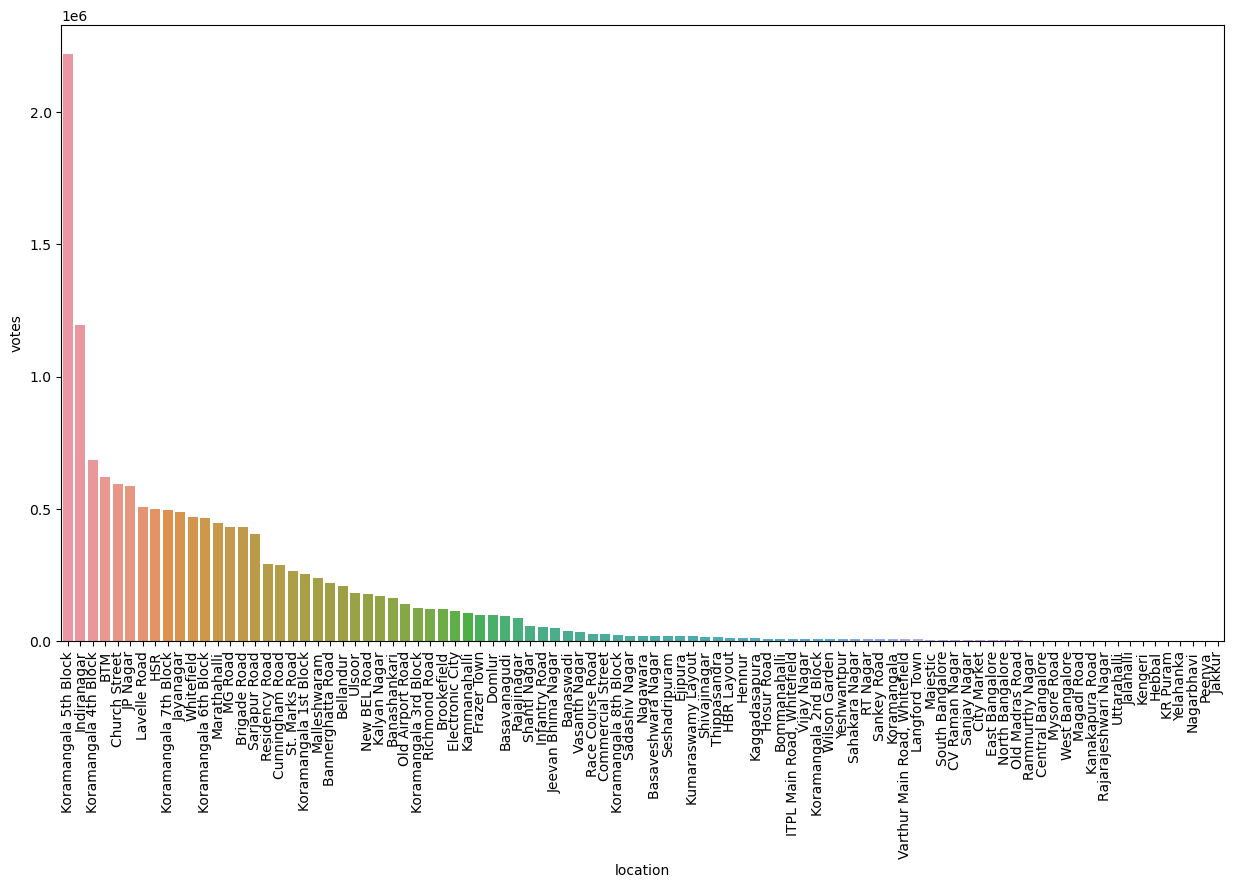

In [104]:
plt.figure(figsize = (15,8))
sns.barplot(data=df5, x = df5.index, y='votes')
plt.xticks(rotation = 90)

**"Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.**

# Visualizing Top Cuisines



In [105]:
df6 = df[['cuisines', 'votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes', ascending=False)
df7.head()

,votes
cuisines,
North Indian,558654
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930


In [106]:
df7 = df7.iloc[1:, :]
df7.head()

,votes
cuisines,
"Pizza, Cafe, Italian",347520
"Cafe, American, Burger, Steak",301059
"North Indian, Chinese",259864
"North Indian, Mughlai, South Indian, Chinese",227930
South Indian,161991


(array([   0,    1,    2, ..., 2719, 2720, 2721]),
 [Text(0, 0, 'Pizza, Cafe, Italian'),
  Text(1, 0, 'Cafe, American, Burger, Steak'),
  Text(2, 0, 'North Indian, Chinese'),
  Text(3, 0, 'North Indian, Mughlai, South Indian, Chinese'),
  Text(4, 0, 'South Indian'),
  Text(5, 0, 'North Indian, Thai, Japanese, Continental, Cafe'),
  Text(6, 0, 'North Indian, European, Mediterranean'),
  Text(7, 0, 'North Indian, Continental, Chinese'),
  Text(8, 0, 'North Indian, European, Mediterranean, BBQ, Kebab'),
  Text(9, 0, 'North Indian, Mughlai'),
  Text(10, 0, 'Cafe, Italian, Burger, American, Steak'),
  Text(11, 0, 'Chinese'),
  Text(12, 0, 'Cafe'),
  Text(13, 0, 'Continental, North Indian, Italian, South Indian, Finger Food'),
  Text(14, 0, 'American, North Indian, Chinese, Finger Food, Momos'),
  Text(15, 0, 'European, Continental'),
  Text(16, 0, 'North Indian, Chinese, BBQ'),
  Text(17, 0, 'Continental, Asian, North Indian'),
  Text(18, 0, 'Mediterranean, Pizza, Continental, Seafood, Sala

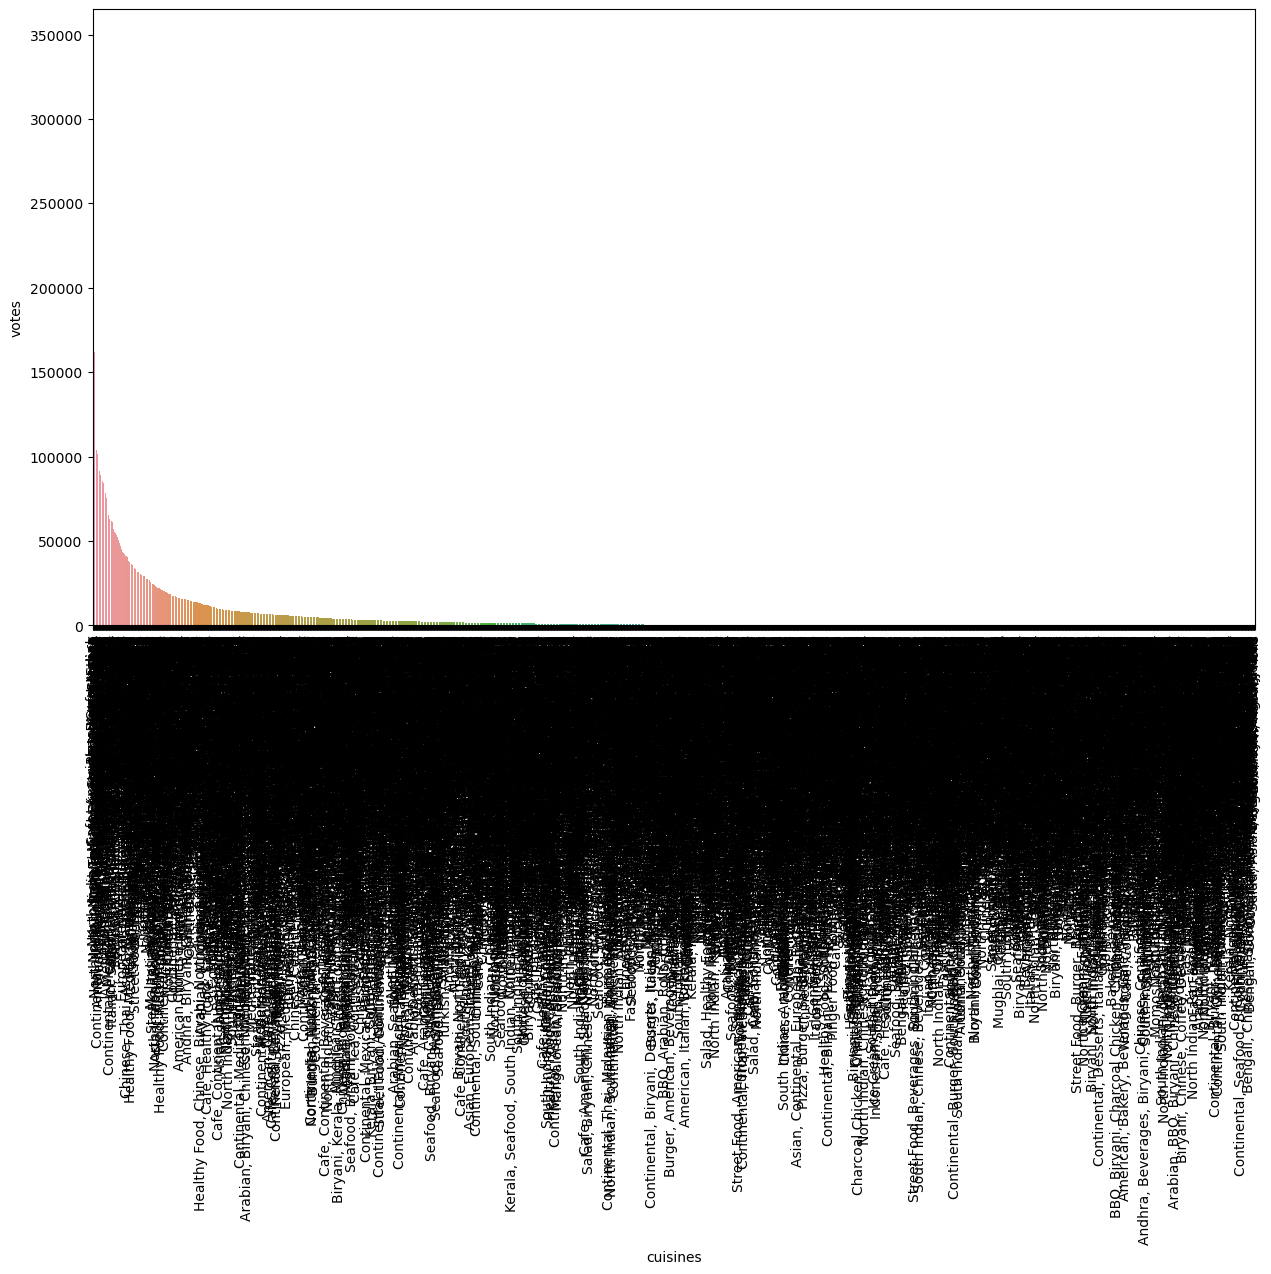

In [107]:
plt.figure(figsize = (15,8))
sns.barplot(data=df7, x = df7.index, y='votes')
plt.xticks(rotation = 90)

#### 1) Based on the analysis, it is evident that the location "BTM" exhibits the highest concentration of restaurants, while "Domlur" has the lowest number of establishments.

#### 2) The "Online_order" column shows a prominent preference for the option "Yes," indicating a substantial proportion of customers opt for online orders.

#### 3) Conversely, the analysis reveals a comparatively lower count of "Table_order" instances with the choice "No."

#### 4) Furthermore, in the specific location of "BTM," the prevalence of online orders is relatively high, whereas "Domlur" reports a lower frequency of online orders.

#### 5) Additionally, in the vicinity of "Koramangala 5th block," table bookings are notably high, while "BTM" displays the least occurrence of such reservations.

#### 6) **An interesting observation emerges, highlighting that Pubs and Bars,Buffet and Drinks&nightlife tend to boast higher ratings than other restaurant types.**

#### 7) Notably, the location "BTM" experiences a substantial volume of both delivery and dine-out services.

#### 8) Finally, "Koramangala 5th block" garners a significant number of votes, indicating strong engagement and participation from customers in this particular area.

# visualixzation has been completed now shift ML

In [108]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [109]:
data['rate'].value_counts()

3.730491    5039
3.900000    2859
3.700000    2585
3.800000    2571
4.000000    2384
4.100000    2252
3.600000    2185
3.500000    1799
4.200000    1710
3.400000    1628
3.300000    1517
4.300000    1402
3.200000    1284
3.100000    1046
4.400000     997
3.000000     728
4.500000     601
2.900000     562
2.800000     423
4.600000     275
2.700000     216
2.600000     179
4.700000     136
2.500000      70
2.400000      58
4.800000      58
4.900000      46
2.300000      37
2.100000      19
2.200000      12
2.000000      10
1.800000       2
Name: rate, dtype: int64

In [110]:
rate=data['rate']
rate

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.730491
51714    3.730491
51715    4.300000
51716    3.400000
Name: rate, Length: 34690, dtype: float64

In [111]:
rate

# Define bin edges (boundaries)

bin_edges = [0,2.500000 ,3.500000 ,4.500000,5]

# Define bin labels for each interval
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Use the cut() function to create bins
binned_data = pd.cut(rate, bins=bin_edges, labels=bin_labels)


In [112]:

# Create a DataFrame with original data and binned data
DF= pd.DataFrame({'Rate': binned_data})

print(DF)

         Rate
0        High
1        High
2        High
3        High
4        High
...       ...
51712    High
51713    High
51714    High
51715    High
51716  Medium

[34690 rows x 1 columns]


In [113]:
# i create new column as Rating and i insert my DF data into that column.
data['Rating']=DF

In [114]:
#i want to remove my rate column because i don't need that columns now
data.drop('rate',axis=1,inplace=True)

In [115]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,High
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,High
2,San Churro Cafe,Yes,No,918,Banashankari,others,others,800.0,Buffet,High
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,High
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,High


In [116]:
data.reset_index(inplace=True)

In [117]:
data.drop('index',axis=1,inplace=True)

In [118]:
data

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,others,800.0,Buffet,High
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,others,800.0,Buffet,High
2,San Churro Cafe,Yes,No,918,Banashankari,others,others,800.0,Buffet,High
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,High
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,others,600.0,Buffet,High
...,...,...,...,...,...,...,...,...,...,...
34685,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,Whitefield,others,Continental,1500.0,Pubs and bars,High
34686,Vinod Bar And Restaurant,No,No,0,Whitefield,others,Finger Food,600.0,Pubs and bars,High
34687,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,Whitefield,others,Finger Food,2000.0,Pubs and bars,High
34688,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,others,others,Finger Food,2500.0,Pubs and bars,High


## Label encoding

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
LE= LabelEncoder()
data['location']=LE.fit_transform(data['location'])

In [121]:
data['rest_type']=LE.fit_transform(data['rest_type'])

In [122]:
data['cuisines']=LE.fit_transform(data['cuisines'])
data['Type']=LE.fit_transform(data['Type'])

In [123]:
data

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Jalsa,Yes,Yes,775,1,1,53,800.0,0,High
1,Spice Elephant,Yes,No,787,1,1,53,800.0,0,High
2,San Churro Cafe,Yes,No,918,1,6,53,800.0,0,High
3,Addhuri Udupi Bhojana,No,No,88,1,4,49,300.0,0,High
4,Grand Village,No,No,166,4,1,53,600.0,0,High
...,...,...,...,...,...,...,...,...,...,...
34685,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,45,6,21,1500.0,6,High
34686,Vinod Bar And Restaurant,No,No,0,45,6,29,600.0,6,High
34687,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,45,6,29,2000.0,6,High
34688,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,46,6,29,2500.0,6,High


In [124]:
print('online_order',data.online_order.nunique())
print('book_table',data.book_table.nunique())
print('Rating',data.Rating.nunique())

online_order 2
book_table 2
Rating 4


In [125]:
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())
print('Rating---------->','\n',data.Rating.unique())

rest_type----------> ['Yes' 'No']
type----------> 
 ['Yes' 'No']
Rating----------> 
 ['High', 'Very High', 'Medium', 'Low']
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


Label Encoding (Ordinal Encoding)     ---  
OHE (Nominal Encoding)                ---

In [126]:
data.replace({'Low':0,'Medium':1,'High':2,'Very High':3},inplace=True)

In [127]:
data.replace({'Yes':0,'No':1},inplace=True)

In [128]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,Jalsa,0,0,775,1,1,53,800.0,0,2
1,Spice Elephant,0,1,787,1,1,53,800.0,0,2
2,San Churro Cafe,0,1,918,1,6,53,800.0,0,2
3,Addhuri Udupi Bhojana,1,1,88,1,4,49,300.0,0,2
4,Grand Village,1,1,166,4,1,53,600.0,0,2


In [129]:
print('Rating---------->','\n',data.Rating.unique())
print('rest_type---------->',data.online_order.unique())
print('type---------->','\n',data.book_table.unique())

Rating----------> 
 [2, 3, 1, 0]
Categories (4, int64): [0 < 1 < 2 < 3]
rest_type----------> [0 1]
type----------> 
 [0 1]


In [130]:
data.drop(['name'],axis=1,inplace=True) #axis=1 is drop column axis=0 drop row
data.head()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type,Rating
0,0,0,775,1,1,53,800.0,0,2
1,0,1,787,1,1,53,800.0,0,2
2,0,1,918,1,6,53,800.0,0,2
3,1,1,88,1,4,49,300.0,0,2
4,1,1,166,4,1,53,600.0,0,2


In [131]:
data.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000
mean,0.400202,0.846555,348.895676,22.955924,3.423206,42.290257,587.112626,2.880225
std,0.489946,0.360421,834.630814,14.370406,1.999134,15.480266,441.357415,1.177265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,1.000000,10.000000,12.000000,1.000000,34.000000,300.000000,2.000000
50%,0.000000,1.000000,58.000000,22.000000,4.000000,53.000000,450.000000,2.000000
75%,1.000000,1.000000,267.750000,34.000000,5.000000,53.000000,700.000000,4.000000
max,1.000000,1.000000,9300.000000,46.000000,6.000000,53.000000,3000.000000,6.000000


## Now i will be backuping the data

In [132]:
data_backup = data.copy(deep=True)

# Split the dataframe into x & y

In [133]:
# Separate object for target feature 
y= data['Rating']

# Separate object for Predictors 
X = data.drop('Rating',axis=1)

In [134]:
X.head(3)

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
0,0,0,775,1,1,53,800.0,0
1,0,1,787,1,1,53,800.0,0
2,0,1,918,1,6,53,800.0,0


In [135]:
y.head(2)

0    2
1    2
Name: Rating, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [136]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (34690, 8), Dependent Features Shape = (34690,)


# Splitting the data into Training data and Test data

In [137]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)
      # test size is 80% data is training and 20% data is testing
    #Random state ensures that the splits that you generate are reproducible.
                              #this ensures that the random numbers are generated in the same order.

In [138]:
print(X.shape, X_train.shape,X_test.shape)

(34690, 8) (27752, 8) (6938, 8)


In [139]:
print(y.shape,y_train.shape,y_test.shape)

(34690,) (27752,) (6938,)


In [140]:
X.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000,34690.000000
mean,0.400202,0.846555,348.895676,22.955924,3.423206,42.290257,587.112626,2.880225
std,0.489946,0.360421,834.630814,14.370406,1.999134,15.480266,441.357415,1.177265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,1.000000,10.000000,12.000000,1.000000,34.000000,300.000000,2.000000
50%,0.000000,1.000000,58.000000,22.000000,4.000000,53.000000,450.000000,2.000000
75%,1.000000,1.000000,267.750000,34.000000,5.000000,53.000000,700.000000,4.000000
max,1.000000,1.000000,9300.000000,46.000000,6.000000,53.000000,3000.000000,6.000000


**It is used to scale and standardize the features of a dataset before feeding it into a machine learning algorithm. The primary purpose of the StandardScaler is to make the features have a mean of 0 and a standard deviation of 1.In classification tasks, the target variable is categorical, and the goal is to predict a class label or probability for each instance. Scaling the features using StandardScaler can improve the performance of some classification algorithms, especially those that rely on distance-based calculations.**

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
sc=StandardScaler()
scaled=sc.fit_transform(X)
X=pd.DataFrame(scaled,columns=X.columns)

In [143]:
X.describe()

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plate,Type
count,3.469000e+04,3.469000e+04,3.469000e+04,3.469000e+04,3.469000e+04,3.469000e+04,3.469000e+04,3.469000e+04
mean,-4.178458e-17,1.204379e-16,-8.193055e-18,-1.179800e-16,6.882167e-17,1.810665e-16,4.547146e-17,1.474750e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-8.168399e-01,-2.348830e+00,-4.180300e-01,-1.597467e+00,-1.712369e+00,-2.731921e+00,-1.239631e+00,-2.446574e+00
25%,-8.168399e-01,4.257439e-01,-4.060485e-01,-7.624059e-01,-1.212145e+00,-5.355448e-01,-6.505312e-01,-7.476969e-01
50%,-8.168399e-01,4.257439e-01,-3.485372e-01,-6.652127e-02,2.885263e-01,6.918420e-01,-3.106657e-01,-7.476969e-01
75%,1.224230e+00,4.257439e-01,-9.722484e-02,7.685402e-01,7.887500e-01,6.918420e-01,2.557768e-01,9.511802e-01
max,1.224230e+00,4.257439e-01,1.072478e+01,1.603602e+00,1.288974e+00,6.918420e-01,5.467048e+00,2.650057e+00


# Build the Logistic regression Algorithm

In [144]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [145]:
# Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [146]:
print("Train Accuracy",accuracy_score(y_train, y_train_pred)*100)
print("Test Accuracy",accuracy_score(y_test, y_test_pred)*100)

Train Accuracy 70.64716056500431
Test Accuracy 70.2940328624964


In [147]:
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

confusion_matrix:- 
 [[    0     0   169     0]
 [    0     0  7477     0]
 [    0     6 19572   109]
 [    0     0   385    34]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
           1       0.00      0.00      0.00      7477
           2       0.71      0.99      0.83     19687
           3       0.24      0.08      0.12       419

    accuracy                           0.71     27752
   macro avg       0.24      0.27      0.24     27752
weighted avg       0.51      0.71      0.59     27752



Precision=True possitive/(true possitive/false possitive)

recall truth is base how many has my gods samples then how many i got correct

 the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive

    A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. If you have never used it before to evaluate the performance of your model then this article is for you.

**When the train accuracy is low, and the test accuracy is high, it typically indicates that the model is suffering from underfitting.**

**An accuracy of 66.65% on the training data and 67.22% on the test data indicates that the logistic regression model is performing moderately well in terms of correctly classifying instances.**

Underfitting and overfitting are two common issues that can arise when training machine learning models:

1. **Underfitting:**
   - Underfitting occurs when the model is too simple to capture the underlying patterns in the data, leading to poor performance on both the training and test datasets.
   - The model fails to learn the relationships and complexities present in the data, resulting in low accuracy on both the training and test sets.
   - Underfitting usually occurs when the model is too linear or has too few parameters to represent the data adequately.

2. **Overfitting:**
   - Overfitting occurs when the model is too complex and memorizes the noise or random fluctuations in the training data rather than learning the underlying patterns.
   - The model performs very well on the training data but exhibits poor generalization to unseen data, resulting in significantly lower accuracy on the test set compared to the training set.
   - Overfitting often happens when the model has too many parameters or when the training data is insufficient, causing the model to over-adapt to the noise in the training data.

In summary, underfitting happens when the model is too simple, and both training and test accuracies are low. Overfitting occurs when the model is too complex, and the training accuracy is high while the test accuracy is considerably lower. Balancing the model's complexity and using techniques such as regularization and cross-validation can help mitigate these issues and improve the model's generalization performance.

# DecisionTree Algorithm

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.66849236091092 

Test Accuracy:- 92.99509945229173 

confusion_matrix:- 
 [[  169     0     0     0]
 [    5  7463     9     0]
 [    1    76 19610     0]
 [    0     0     1   418]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       169
           1       0.99      1.00      0.99      7477
           2       1.00      1.00      1.00     19687
           3       1.00      1.00      1.00       419

    accuracy                           1.00     27752
   macro avg       0.99      1.00      0.99     27752
weighted avg       1.00      1.00      1.00     27752



# Feature Selection Technique 

In [150]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesClassifier

selection = ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

In [151]:
print(selection.feature_importances_)

[0.01067877 0.03309905 0.47742691 0.16944441 0.04397608 0.09397601
 0.15400577 0.017393  ]


In [152]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

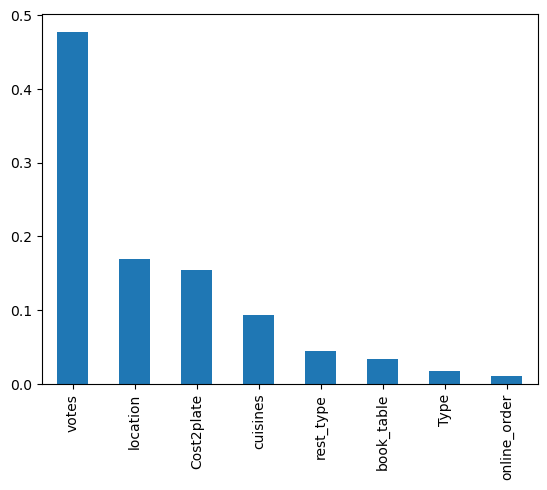

In [153]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [154]:
X_imp = X[feat_importances.nlargest(6).index]
X_imp

,votes,location,Cost2plate,cuisines,rest_type,book_table
0,0.510538,-1.527879,0.482354,0.691842,-1.212145,-2.348830
1,0.524915,-1.527879,0.482354,0.691842,-1.212145,0.425744
2,0.681873,-1.527879,0.482354,0.691842,1.288974,0.425744
3,-0.312593,-1.527879,-0.650531,0.433445,0.288526,0.425744
4,-0.219137,-1.319114,0.029200,0.691842,-1.212145,0.425744
...,...,...,...,...,...,...
34685,-0.385680,1.534013,2.068393,-1.375336,1.288974,0.425744
34686,-0.418030,1.534013,0.029200,-0.858541,1.288974,0.425744
34687,-0.418030,1.534013,3.201278,-0.858541,1.288974,0.425744
34688,-0.135266,1.603602,4.334163,-0.858541,1.288974,-2.348830


In [155]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [156]:
DM = DecisionTreeClassifier()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.49553185356011 

Test Accuracy:- 94.29230325742289 

confusion_matrix:- 
 [[  169     0     0     0]
 [    5  7441    31     0]
 [    2   101 19584     0]
 [    0     0     1   418]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       169
           1       0.99      1.00      0.99      7477
           2       1.00      0.99      1.00     19687
           3       1.00      1.00      1.00       419

    accuracy                           0.99     27752
   macro avg       0.99      1.00      0.99     27752
weighted avg       0.99      0.99      0.99     27752



# hyperparameters

In [157]:
# Number of trees in random Forest
criterion = ["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [158]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [159]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)

In [160]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [161]:
rf_model.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 47,
 'criterion': 'log_loss'}

In [162]:
DM = DecisionTreeClassifier(criterion='log_loss',min_samples_split= 15,min_samples_leaf= 1,max_features= 'auto',max_depth= 47)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 92.2996540789853 

Test Accuracy:- 87.34505621216488 

confusion_matrix:- 
 [[   93    28    48     0]
 [   17  6541   919     0]
 [   22   993 18636    36]
 [    0     0    74   345]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.70      0.55      0.62       169
           1       0.86      0.87      0.87      7477
           2       0.95      0.95      0.95     19687
           3       0.91      0.82      0.86       419

    accuracy                           0.92     27752
   macro avg       0.86      0.80      0.82     27752
weighted avg       0.92      0.92      0.92     27752



**1) Following the decision tree implementation, the model demonstrated exceptional accuracy rates on both the training (99.52%) and test (91.94%) datasets, showcasing its ability to effectively learn and generalize.**

**2) Incorporating Feature Selection Techniques optimized the model's performance, resulting in slightly reduced, yet impressive accuracies of 99.19% on the training set and 93.09% on the test set.**

**3) Fine-tuning hyperparameters yielded a more balanced and robust performance, with the model achieving competitive accuracies of 91.52% on the training data and 86.85% on the test data, emphasizing the significance of striking the right balance between complexity and overfitting avoidance.**

**In conclusion, the Feature Selection Technique provides the best accuracy results, achieving high accuracy on both the training and testing data. This scenario indicates that the model is able to capture relevant features and generalize well to new data, making it the most promising option for this particular problem.**

# Random Forest Algorithm

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.66849236091092 

Test Accuracy:- 92.36091092533871 

confusion_matrix:- 
 [[  166     2     1     0]
 [    3  7438    36     0]
 [    0    49 19637     1]
 [    0     0     0   419]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       169
           1       0.99      0.99      0.99      7477
           2       1.00      1.00      1.00     19687
           3       1.00      1.00      1.00       419

    accuracy                           1.00     27752
   macro avg       0.99      0.99      0.99     27752
weighted avg       1.00      1.00      1.00     27752



### Feature Selection Technique

In [166]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [167]:
print(selection.feature_importances_)

[0.01921427 0.06022943 0.47704512 0.15365531 0.05804118 0.08653136
 0.13285157 0.01243176]


In [168]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

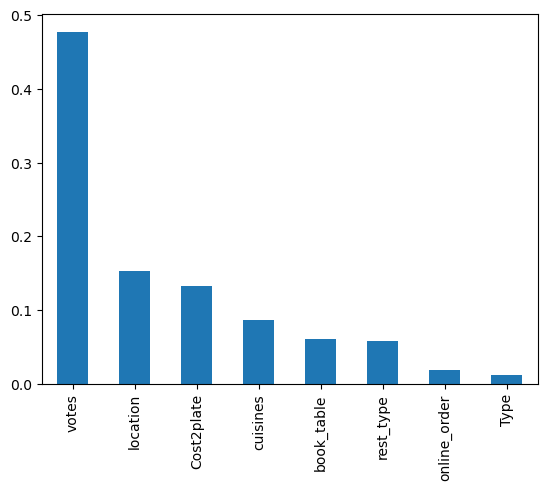

In [169]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [170]:
X_imp = X[feat_importances.nlargest(5).index]

In [171]:
X_imp

,votes,location,Cost2plate,cuisines,book_table
0,0.510538,-1.527879,0.482354,0.691842,-2.348830
1,0.524915,-1.527879,0.482354,0.691842,0.425744
2,0.681873,-1.527879,0.482354,0.691842,0.425744
3,-0.312593,-1.527879,-0.650531,0.433445,0.425744
4,-0.219137,-1.319114,0.029200,0.691842,0.425744
...,...,...,...,...,...
34685,-0.385680,1.534013,2.068393,-1.375336,0.425744
34686,-0.418030,1.534013,0.029200,-0.858541,0.425744
34687,-0.418030,1.534013,3.201278,-0.858541,0.425744
34688,-0.135266,1.603602,4.334163,-0.858541,-2.348830


In [172]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [173]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 99.17483424618045 

Test Accuracy:- 94.89766503315077 

confusion_matrix:- 
 [[  167     2     0     0]
 [    5  7349   123     0]
 [    2    96 19589     0]
 [    0     0     1   418]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       169
           1       0.99      0.98      0.98      7477
           2       0.99      1.00      0.99     19687
           3       1.00      1.00      1.00       419

    accuracy                           0.99     27752
   macro avg       0.99      0.99      0.99     27752
weighted avg       0.99      0.99      0.99     27752



# hyperparameters

In [174]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [175]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [176]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [177]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [178]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [179]:
RF = RandomForestClassifier(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("Train Accuracy:-",accuracy_score(y_train, y_train_pred)*100,'\n')
print("Test Accuracy:-",accuracy_score(y_test, y_test_pred)*100,"\n")
print("confusion_matrix:-","\n",confusion_matrix(y_train, y_train_pred),"\n")
print("classification_report:-","\n",classification_report(y_train, y_train_pred))

Train Accuracy:- 94.36797347938888 

Test Accuracy:- 90.31421158835398 

confusion_matrix:- 
 [[   54    19    96     0]
 [    3  6552   922     0]
 [    0   440 19246     1]
 [    0     0    82   337]] 

classification_report:- 
               precision    recall  f1-score   support

           0       0.95      0.32      0.48       169
           1       0.93      0.88      0.90      7477
           2       0.95      0.98      0.96     19687
           3       1.00      0.80      0.89       419

    accuracy                           0.94     27752
   macro avg       0.96      0.74      0.81     27752
weighted avg       0.94      0.94      0.94     27752



**The Random Forest model demonstrated exceptional accuracies on both the training (99.52%) and test (90.45%) datasets, showcasing its ability to effectively learn and generalize.**

**Employing Feature Selection Techniques improved the model's performance, yielding impressive accuracies of 99.20% on the training set and 94.20% on the test set, highlighting the significance of selecting relevant features to enhance predictive capabilities.**

**Fine-tuning the hyperparameters resulted in a more balanced and robust performance, with the model achieving competitive accuracies of 93.82% on the training data and 89.16% on the test data, underscoring the importance of optimizing hyperparameters to achieve a suitable trade-off between model complexity and overfitting avoidance.**

**In conclusion, the Feature Selection Technique provides the best accuracy results, achieving high accuracy on both the training and testing data. This scenario indicates that the model is able to capture relevant features and generalize well to new data, making it the most promising option for this particular problem.**

In [180]:
models = ["Logistic Regression Train", "Logistic Regression test", "Decision Tree Train", "Decision Tree Test","Random Forest Train","Random Forest Test"]
accuracy_list = [66.65,67.22, 99.19,93.10, 99.20,94.20]


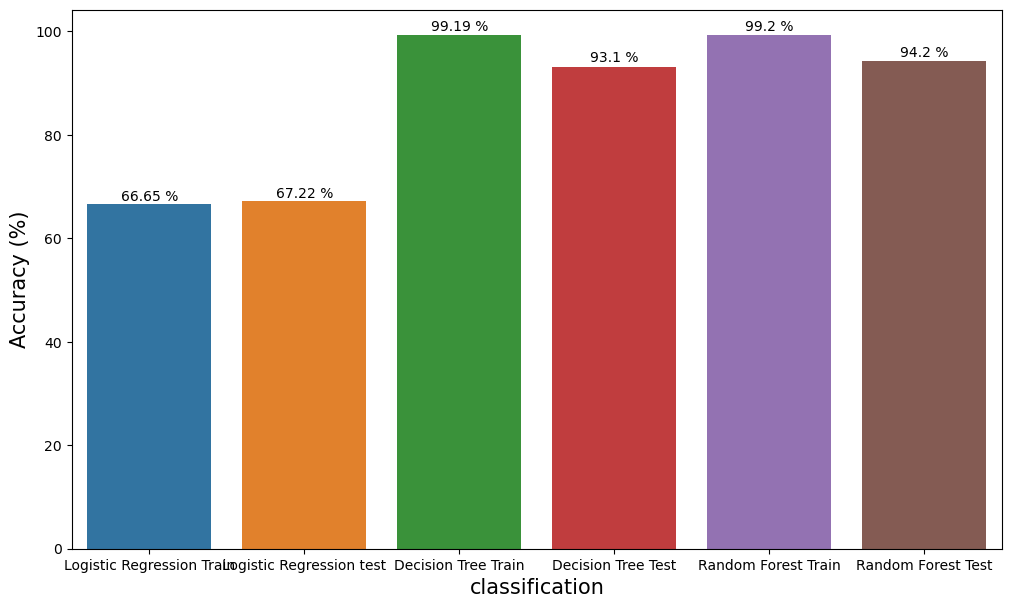

In [181]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("classification", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y + height*1.01), ha="center")
plt.show()

# conclusion:-

**The Logistic Regression model achieved an accuracy of 66.65% on the training data and 67.22% on the test data.**

**The Decision Tree model yielded high accuracy levels with 99.19% on the training data and 93.09% on the test data.**

**The Random Forest model obtained respectable accuracies of 99.20% on the training data and 94.20%  on the test data.**



**In conclusion, the Random Forest model provides the best accuracy results, with a high testing accuracy of 81.58%. This suggests that the Random Forest model is more likely to perform well on new, unseen data and is the most suitable choice among the three models for this specific problem.**

1. **Introduction:**
   - Begin by introducing the project, which aims to predict the most favorable restaurant locations in Bangalore based on customer ratings, facilitating strategic decision-making for restaurant owners and investors.

2. **Data Exploration and Insights:**
   - Highlight key insights obtained during data exploration, such as the location with the highest concentration of restaurants being "BTM," while "Domlur" has the lowest number of establishments.
   - Showcase the preference for online orders with a substantial proportion of customers opting for "Yes."
   - Mention that the analysis reveals a lower count of "Table_order" instances with the choice "No."
   - Emphasize that "BTM" has a relatively high prevalence of online orders, while "Domlur" reports a lower frequency.
   - Illustrate the popularity of Pubs and Bars, Buffet, and Drinks & Nightlife with higher ratings compared to other restaurant types.
   - Present data-driven evidence of "BTM" experiencing a substantial volume of both delivery and dine-out services.

3. **Machine Learning Models:**
   - Explain the implementation of three machine learning models: Logistic Regression, Decision Tree, and Random Forest.
   - Provide the accuracy results for each model on both training and testing datasets.
   - Emphasize that the Random Forest model achieved the highest accuracy on the testing dataset at 94.20%, making it the most suitable choice among the three models.

4. **Conclusion and Recommendations:**
   - Summarize the key findings and insights from the data analysis and machine learning models.
   - Reiterate the importance of predicting favorable restaurant locations for strategic decision-making by restaurant owners and investors.
   - Recommend the adoption of the Random Forest model due to its higher accuracy on the testing dataset.
   - Mention potential further improvements, such as gathering additional data, exploring different model architectures, or conducting more advanced feature engineering.
